In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import duckdb

In [2]:
class DuckDBHelper:
    def __init__(self, duckdb_path):
        self.con = duckdb.connect(database=duckdb_path)
        self.duckdb_path = duckdb_path

    def read_table(self, table_name):
        """
        Read a table from DuckDB and return it as a Pandas DataFrame.
        """
        query = f"SELECT * FROM {table_name}"
        df = self.con.execute(query).df()
        return df

    def list_tables(self):
        """
        List available tables in the DuckDB database.
        """
        tables = self.con.execute("SHOW TABLES").fetchall()
        return [table[0] for table in tables]


In [4]:
duckdb_path = './data/eod.duckdb'
db_helper = DuckDBHelper(duckdb_path)

In [6]:
# 1. Cargar los datos
hogar = db_helper.read_table('hogar')  # Usar DuckDB para cargar la tabla hogar
persona = db_helper.read_table('persona')  # Usar DuckDB para cargar la tabla persona
viajes = db_helper.read_table('viajes_lab')  # Usar DuckDB para cargar la tabla viajes

print('Hogar')
display(hogar.head())
print('Persona')
display(persona.head())
print('Viajes')
display(viajes.head())

# 2. Unir tablas
df = viajes.merge(persona, left_on=['Folio', 'ordenpersona'], right_on=['Folio', 'ordenpersona'], suffixes=('', '_pers'))
df = df.merge(hogar, on='Folio', suffixes=('', '_hog'))

df

Hogar


,Id,Folio,DireccionCalle,DireccionNumero,DireccionDepto,DireccionPiso,DireccionComuna,Coord_Hogar,Zona_Hogar,IdSector,...,RangoTMH,FEH,FCHTH,FEH*FCHTH,IngresoMod,Estrato,FLab_2016,FSab_2016,FDom_2016,FTotal_2016
0,1,800011.0,PLAYA BRAVA,1178,.,.,TALCAHUANO,"-36.714635, -73.138159",211.0,4,...,2,40.254537,0.935484,37.657484,600000.0,2,39.065853,0.0,0.0,35.883249
1,2,800012.0,PLAYA LAS BALZAS,1101,.,.,TALCAHUANO,"-36.714635, -73.138159",211.0,4,...,3,40.254537,3.523315,141.829419,580000.0,2,82.115282,0.0,0.0,70.956238
2,3,800021.0,JUAN JOSE MANZANO,82,.,.,CONCEPCION,"-36.810853, -73.028669",811.0,1,...,2,48.777998,0.728797,35.549236,600000.0,2,47.784849,0.0,0.0,42.372774
3,4,800022.0,IRARRAZABAL,855,.,.,CONCEPCION,"-36.810853, -73.028669",811.0,1,...,1,48.777998,1.888923,92.137875,182000.0,1,39.527745,0.0,0.0,35.085122
4,5,800031.0,JOSE ZAMBRANO OPAZO,1186,.,.,CORONEL,"-36.994425, -73.147444",2830.0,9,...,3,47.967907,1.020518,48.952110,1250000.0,3,82.299423,0.0,0.0,47.369403


Persona


,Id,Folio,ordenpersona,TelefonoContacto1,TelefonoContacto2,DiaEntrevista,MesEntrevista,HoraEntrevista,MinutoEntrevista,Encuestador,...,COMUNA,FEP,FCTH,FCSE,FEP*FCTH*FCSE,IngresoMod,FLab_2015,FSab_2015,FDom_2015,FTotal_2015
0,364,800011.0,1.0,53070995,,8.0,8.0,15.0,0.0,18389052-2,...,TALCAHUANO,44.525486,0.898844,0.921825,36.892817,600000,52.157739,0.0,0.0,46.923991
1,365,800011.0,2.0,53070995,,8.0,8.0,15.0,10.0,18389052-2,...,TALCAHUANO,44.525486,0.898844,1.145802,45.856684,0,52.870303,0.0,0.0,48.196786
2,366,800011.0,3.0,53070995,,8.0,8.0,15.0,30.0,18389052-2,...,TALCAHUANO,44.525486,0.898844,0.992543,39.723055,0,55.935987,0.0,0.0,51.974396
3,367,800012.0,1.0,2437081,,22.0,6.0,13.0,58.0,18389052-2,...,TALCAHUANO,44.525486,3.221817,0.736368,105.634103,300000,53.357253,0.0,0.0,46.941473
4,368,800012.0,2.0,2437081,,22.0,6.0,14.0,34.0,18389052-2,...,TALCAHUANO,44.525486,3.221817,1.145802,164.368676,80000,52.870303,0.0,0.0,48.196786


Viajes


,Id,Campo1,Folio,ordenpersona,ordenviaje,PropositoEstraus,Proposito,Proposito Volver Casa,Proposito_e,OrigenActividadComuna,...,COMUNA DESTINO VIAJE,Distancia Viaje,FEP,FCTH,FCSE,FEP*FCTH*FCSE,Per_Mod,ModoInf,Ftotal,FLaboral
0,27,8000113,800011.0,3.0,1.0,3,11.0,NaN,,TALCAHUANO,...,TALCAHUANO,mayor a 10 km,44.525486,0.89884425609,0.9925434444,39.723055,4,5,51.974396,55.935987
1,28,8000113,800011.0,3.0,2.0,3,7.0,11.0,,TALCAHUANO,...,TALCAHUANO,mayor a 10 km,44.525486,0.89884425609,0.9925434444,39.723055,5,5,51.974396,55.935987
2,29,8000121,800012.0,1.0,1.0,3,7.0,7.0,,CONCEPCION,...,TALCAHUANO,mayor a 10 km,44.525486,3.2218169397,0.73636750398,105.634103,2,5,46.941473,53.357253
3,30,8000122,800012.0,2.0,1.0,1,1.0,NaN,,TALCAHUANO,...,HUALPEN,mayor a 10 km,44.525486,3.2218169397,1.1458018656,164.368676,1,5,48.196786,52.870303
4,31,8000122,800012.0,2.0,2.0,1,7.0,1.0,,HUALPEN,...,TALCAHUANO,mayor a 10 km,44.525486,3.2218169397,1.1458018656,164.368676,5,5,48.196786,52.870303


,Id,Campo1,Folio,ordenpersona,ordenviaje,PropositoEstraus,Proposito,Proposito Volver Casa,Proposito_e,OrigenActividadComuna,...,RangoTMH,FEH,FCHTH,FEH*FCHTH,IngresoMod_hog,Estrato,FLab_2016,FSab_2016,FDom_2016,FTotal_2016
0,27,8000113,800011.0,3.0,1.0,3,11.0,NaN,,TALCAHUANO,...,2,40.254537,0.935484,37.657484,600000.0,2,39.065853,0.0,0.0,35.883249
1,28,8000113,800011.0,3.0,2.0,3,7.0,11.0,,TALCAHUANO,...,2,40.254537,0.935484,37.657484,600000.0,2,39.065853,0.0,0.0,35.883249
2,29,8000121,800012.0,1.0,1.0,3,7.0,7.0,,CONCEPCION,...,3,40.254537,3.523315,141.829419,580000.0,2,82.115282,0.0,0.0,70.956238
3,30,8000122,800012.0,2.0,1.0,1,1.0,NaN,,TALCAHUANO,...,3,40.254537,3.523315,141.829419,580000.0,2,82.115282,0.0,0.0,70.956238
4,31,8000122,800012.0,2.0,2.0,1,7.0,1.0,,HUALPEN,...,3,40.254537,3.523315,141.829419,580000.0,2,82.115282,0.0,0.0,70.956238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42191,42192,9331152,933115.0,2.0,2.0,1,7.0,1.0,,concepcion,...,2,32.328644,1.687510,54.554917,1000000.0,2,45.999427,0.0,0.0,37.704323
42192,42193,9331153,933115.0,3.0,1.0,2,3.0,NaN,,TOME,...,2,32.328644,1.687510,54.554917,1000000.0,2,45.999427,0.0,0.0,37.704323
42193,42194,9331153,933115.0,3.0,2.0,2,7.0,3.0,,tome,...,2,32.328644,1.687510,54.554917,1000000.0,2,45.999427,0.0,0.0,37.704323
42194,42195,9331154,933115.0,4.0,1.0,2,3.0,NaN,,TOME,...,2,32.328644,1.687510,54.554917,1000000.0,2,45.999427,0.0,0.0,37.704323


In [ ]:
# 3. Seleccionar columnas relevantes para features y target
features = [
    # Variables del hogar
    'DireccionComuna', 'Estrato', 'TamanoFamiliar', 'NumeroVehiculos', 'IngresoMod',
    # Variables de la persona
    'Sexo', 'Parentesco', 'MesNacimiento',
    # Variables del viaje
    'Motivo',  # Cambia por el nombre real si es distinto, a veces es 'Proposito' o 'Proposito_e'
    'Distancia', 'Periodo', 'TIPO DIA', 'NumeroEtapasViaje'
]
target = 'Modo Viaje'  # Cambia por el nombre correcto si es diferente, como 'ModoAgregado' o 'ModoEtapa1'

# 4. Limpiar y reducir dataset
# Dejar solo las columnas existentes (algunas pueden no estar según la encuesta)
cols_existentes = [col for col in features if col in df.columns]
X = df[cols_existentes].copy()
y = df[target].copy()

# 5. Preprocesar variables categóricas (one-hot para categorías)
X = pd.get_dummies(X, drop_first=True)

# 6. Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Entrenar modelo básico
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 8. Evaluar
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# (Opcional) Importancia de features
importances = pd.Series(clf.feature_importances_, index=X.columns)
print("Variables más importantes:\n")
print(importances.sort_values(ascending=False).head(15))

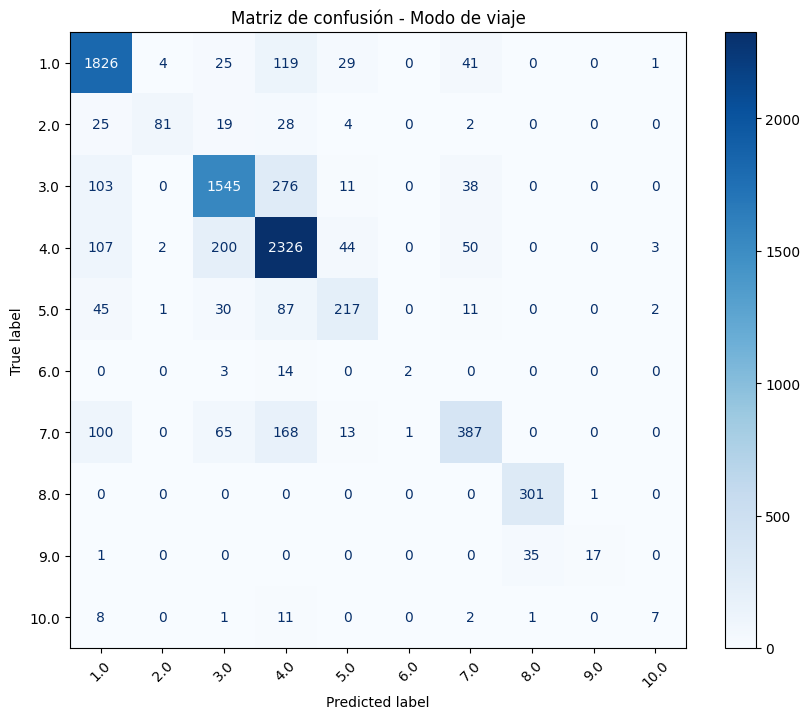

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())  # Ordenar los modos por su valor numérico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Matriz de confusión - Modo de viaje")
plt.show()
